In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from codec import ImageCompressor
import warnings
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from PIL import Image

In [50]:
min_sparcity = 130
min_n = 2**4
max_n = 2**5
a_cols = 256
fif_version = 2
magic_number = b'FIF'  # Ensure this is a bytes object
header_format = '3sBiiBBBBB'
v_format_precision = "f" 
max_error = 0.1

newCodec = ImageCompressor(min_sparcity,
                           min_n,
                           max_n,
                           a_cols,
                           fif_version,
                           magic_number,
                           header_format,
                           v_format_precision,
                           max_error
                          )

In [55]:
input_file = 'lena.png'
output_file = 'lena_compressed.fif'
with warnings.catch_warnings():
    # Following RuntimeWarning ignored:
    # Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary.
    # The requested precision might not have been met.
    warnings.simplefilter("ignore", RuntimeWarning)    
    newCodec.encode(input_file, output_file)

bytes_written: 1569480
processed_blocks: 2502
Output file saved to: lena_reconstructed.png
compression_rate: 2.5336980369794033


In [ ]:
input_file = 'lena_compressed.fif'
output_file = 'lena_reconstructed.png'
newCodec.decode(input_file, output_file)
compression_rate = newCodec.image_rawsize / newCodec.non_zero_coefs
print(f"Compression rate: {compression_rate}")

SSIM Index: 0.8641383076689448


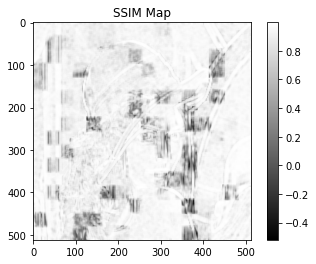

In [58]:
path = ""
image1 = img_as_float(io.imread(path + 'lena.png', as_gray=True))
image2 = img_as_float(io.imread('lena_reconstructed.png', as_gray=True))

if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions.")

ssim_index, ssim_image = ssim(image1,
                              image2,
                              full=True,
                              data_range=image1.max() - image1.min()
                             )

print(f"SSIM Index: {ssim_index}")
plt.imshow(ssim_image, cmap='gray')
plt.title('SSIM Map')
plt.colorbar()
plt.show()

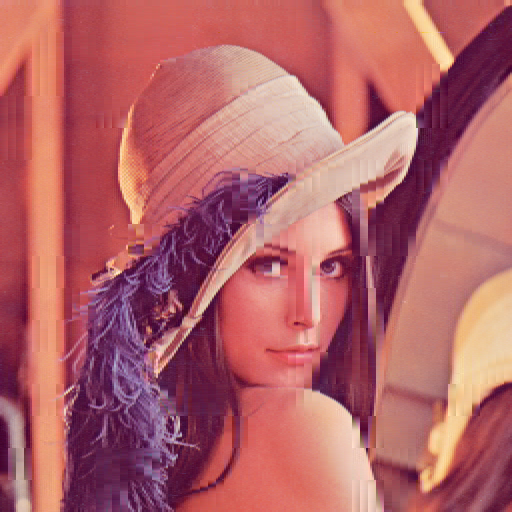

In [57]:
image = Image.open('lena_reconstructed.png')
image_rgb = image.convert('RGB')
image_rgb